In [2]:
from util.models.team import OverwatchTeam, shuffle, mean_delta, shuffle_rank_weights, balance_teams
from util.models.player import Player
from util.models.role import Role
from util.models.rank import OverwatchRank
import random
from rich import print
import matplotlib.pyplot as plt

def create_random_players(si: int, ei: int):
    for i in range(si, ei):
        rank = OverwatchRank(random.randint(1, 36))

        # if i % 3 == 0:
        #     rank = OverwatchRank(random.randint(1, 10))
        # else:
        #     rank = OverwatchRank(random.randint(15, 35))
        
        role = Role(random.randint(1, 3))
        yield Player(user=f"Player {i}", rank=rank, role=role, total_games=0)



def show(team1: OverwatchTeam, team2: OverwatchTeam):
    delta = mean_delta(team1, team2)
    t1delta = team1.rank_mean()
    t2delta = team2.rank_mean()
    team1, team2 = sorted(list(team1), key=lambda x:x.role.value ), sorted(list(team2), key=lambda x:x.role.value )
    for p1, p2 in zip(team1, team2):
        print(f"{p1.user} {p1.role} {p1.rank.name} | {p2.user} {p2.role} {p2.rank.name}")
    print(f"Team 1: {t1delta} | Team 2: {t2delta}")
    print(delta)

data_results: list[dict] = list()
all_data = list()

for iter_length in range(1, 250):
    results = list()

    for i in range(250):
        team1 = OverwatchTeam("Team 1")
        team2 = OverwatchTeam("Team 2")
        t1p = list(create_random_players(0, 50))
        t2p = list(create_random_players(55, 100))

        for player in t1p:
            team1.add(player)

        for player in t2p:
            team2.add(player)

        balance_teams(team1, team2, iter_length)
        results.append(mean_delta(team1, team2))

    min_ = min(results)
    max_ = max(results)
    average = sum(results) / len(results)
    data_results.append({"min": min_, "max": max_, "average": average, "iterations": iter_length})
    print(f"Min: {min_} | Max: {max_} | Average: {average} | Iterations: {iter_length}")
    all_data.extend(results)

min_values = [d["min"] for d in data_results]
max_values = [d["max"] for d in data_results]
average_values = [d["average"] for d in data_results]
iterations = [d["iterations"] for d in data_results]

Min: 0.0 | Max: 17.2 | Average: 5.138399999999996 | Iterations: 1

Min: 0.0 | Max: 15.4 | Average: 3.6296000000000017 | Iterations: 2

Min: 0.0 | Max: 11.0 | Average: 2.8080000000000016 | Iterations: 3

Min: 0.0 | Max: 11.2 | Average: 1.9183999999999999 | Iterations: 4

Min: 0.0 | Max: 13.4 | Average: 1.7527999999999981 | Iterations: 5

Min: 0.0 | Max: 9.600000000000001 | Average: 1.6343999999999996 | Iterations: 6

Min: 0.0 | Max: 7.600000000000001 | Average: 1.3520000000000003 | Iterations: 7

Min: 0.0 | Max: 5.800000000000001 | Average: 1.1983999999999986 | Iterations: 8

Min: 0.0 | Max: 6.999999999999998 | Average: 1.1071999999999989 | Iterations: 9

Min: 0.0 | Max: 5.0 | Average: 0.9687999999999998 | Iterations: 10

Min: 0.0 | Max: 4.200000000000003 | Average: 0.8967999999999995 | Iterations: 11

Min: 0.0 | Max: 4.600000000000001 | Average: 0.8839999999999995 | Iterations: 12

Min: 0.0 | Max: 4.199999999999999 | Average: 0.8463999999999998 | Iterations: 13

Min: 0.0 | Max: 5.800000000000001 | Average: 0.9007999999999996 | Iterations: 14

Min: 0.0 | Max: 5.799999999999999 | Average: 0.7367999999999995 | Iterations: 15

Min: 0.0 | Max: 5.000000000000002 | Average: 0.8088000000000005 | Iterations: 16

Min: 0.0 | Max: 3.799999999999997 | Average: 0.6127999999999998 | Iterations: 17

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.7224000000000002 | Iterations: 18

Min: 0.0 | Max: 4.0 | Average: 0.6768000000000002 | Iterations: 19

Min: 0.0 | Max: 5.800000000000001 | Average: 0.6567999999999995 | Iterations: 20

Min: 0.0 | Max: 4.200000000000001 | Average: 0.6824000000000003 | Iterations: 21

Min: 0.0 | Max: 3.799999999999999 | Average: 0.6567999999999998 | Iterations: 22

Min: 0.0 | Max: 4.200000000000001 | Average: 0.6336 | Iterations: 23

Min: 0.0 | Max: 4.0 | Average: 0.5216000000000004 | Iterations: 24

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.5560000000000004 | Iterations: 25

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.4992000000000006 | Iterations: 26

Min: 0.0 | Max: 3.6000000000000014 | Average: 0.5088000000000005 | Iterations: 27

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.5296000000000006 | Iterations: 28

Min: 0.0 | Max: 4.4 | Average: 0.5327999999999999 | Iterations: 29

Min: 0.0 | Max: 3.0 | Average: 0.5312000000000004 | Iterations: 30

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.5160000000000003 | Iterations: 31

Min: 0.0 | Max: 4.0 | Average: 0.5128000000000001 | Iterations: 32

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.5336000000000004 | Iterations: 33

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.5504000000000004 | Iterations: 34

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.45600000000000074 | Iterations: 35

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.4736000000000003 | Iterations: 36

Min: 0.0 | Max: 3.599999999999998 | Average: 0.469600000000001 | Iterations: 37

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.4832000000000005 | Iterations: 38

Min: 0.0 | Max: 3.6000000000000014 | Average: 0.4472000000000008 | Iterations: 39

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.4776000000000007 | Iterations: 40

Min: 0.0 | Max: 4.0 | Average: 0.48880000000000084 | Iterations: 41

Min: 0.0 | Max: 3.400000000000002 | Average: 0.4752000000000005 | Iterations: 42

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.45200000000000046 | Iterations: 43

Min: 0.0 | Max: 2.799999999999999 | Average: 0.4520000000000001 | Iterations: 44

Min: 0.0 | Max: 3.400000000000002 | Average: 0.49840000000000056 | Iterations: 45

Min: 0.0 | Max: 4.4 | Average: 0.4392000000000006 | Iterations: 46

Min: 0.0 | Max: 4.0 | Average: 0.47840000000000027 | Iterations: 47

Min: 0.0 | Max: 4.0 | Average: 0.47600000000000037 | Iterations: 48

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3888000000000006 | Iterations: 49

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.39360000000000056 | Iterations: 50

Min: 0.0 | Max: 2.400000000000002 | Average: 0.40080000000000066 | Iterations: 51

Min: 0.0 | Max: 3.799999999999997 | Average: 0.47040000000000054 | Iterations: 52

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.4464000000000003 | Iterations: 53

Min: 0.0 | Max: 5.199999999999999 | Average: 0.42000000000000026 | Iterations: 54

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.5256000000000004 | Iterations: 55

Min: 0.0 | Max: 4.200000000000003 | Average: 0.47120000000000073 | Iterations: 56

Min: 0.0 | Max: 3.0 | Average: 0.4432000000000007 | Iterations: 57

Min: 0.0 | Max: 3.200000000000001 | Average: 0.4568000000000005 | Iterations: 58

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.4392000000000005 | Iterations: 59

Min: 0.0 | Max: 3.0 | Average: 0.4072000000000005 | Iterations: 60

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.37520000000000037 | Iterations: 61

Min: 0.0 | Max: 3.0 | Average: 0.38000000000000067 | Iterations: 62

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.4240000000000008 | Iterations: 63

Min: 0.0 | Max: 2.0000000000000018 | Average: 0.3728000000000005 | Iterations: 64

Min: 0.0 | Max: 2.799999999999997 | Average: 0.41760000000000047 | Iterations: 65

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.4200000000000006 | Iterations: 66

Min: 0.0 | Max: 4.600000000000001 | Average: 0.4040000000000003 | Iterations: 67

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.39600000000000074 | Iterations: 68

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.4264000000000004 | Iterations: 69

Min: 0.0 | Max: 4.999999999999998 | Average: 0.43840000000000034 | Iterations: 70

Min: 0.0 | Max: 2.5999999999999996 | Average: 0.3824000000000004 | Iterations: 71

Min: 0.0 | Max: 2.5999999999999996 | Average: 0.3872000000000001 | Iterations: 72

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.35440000000000055 | Iterations: 73

Min: 0.0 | Max: 4.0 | Average: 0.43760000000000066 | Iterations: 74

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3864000000000005 | Iterations: 75

Min: 0.0 | Max: 3.0 | Average: 0.38480000000000053 | Iterations: 76

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.39040000000000025 | Iterations: 77

Min: 0.0 | Max: 2.799999999999999 | Average: 0.36400000000000066 | Iterations: 78

Min: 0.0 | Max: 3.0 | Average: 0.3720000000000003 | Iterations: 79

Min: 0.0 | Max: 2.599999999999998 | Average: 0.4120000000000006 | Iterations: 80

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.40320000000000045 | Iterations: 81

Min: 0.0 | Max: 2.200000000000003 | Average: 0.36560000000000076 | Iterations: 82

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.4152000000000005 | Iterations: 83

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.4264000000000005 | Iterations: 84

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.40000000000000063 | Iterations: 85

Min: 0.0 | Max: 3.0 | Average: 0.43440000000000034 | Iterations: 86

Min: 0.0 | Max: 2.400000000000002 | Average: 0.3656000000000005 | Iterations: 87

Min: 0.0 | Max: 3.0 | Average: 0.42640000000000067 | Iterations: 88

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3760000000000006 | Iterations: 89

Min: 0.0 | Max: 4.400000000000002 | Average: 0.38480000000000064 | Iterations: 90

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.38480000000000036 | Iterations: 91

Min: 0.0 | Max: 4.4 | Average: 0.3928000000000008 | Iterations: 92

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3896000000000007 | Iterations: 93

Min: 0.0 | Max: 3.4000000000000004 | Average: 0.4112000000000003 | Iterations: 94

Min: 0.0 | Max: 2.799999999999999 | Average: 0.41200000000000064 | Iterations: 95

Min: 0.0 | Max: 3.400000000000002 | Average: 0.3744000000000008 | Iterations: 96

Min: 0.0 | Max: 2.4000000000000004 | Average: 0.37600000000000056 | Iterations: 97

Min: 0.0 | Max: 3.0 | Average: 0.41280000000000044 | Iterations: 98

Min: 0.0 | Max: 2.400000000000002 | Average: 0.3656000000000005 | Iterations: 99

Min: 0.0 | Max: 2.400000000000002 | Average: 0.3616000000000004 | Iterations: 100

Min: 0.0 | Max: 3.5999999999999996 | Average: 0.38720000000000077 | Iterations: 101

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.39920000000000033 | Iterations: 102

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.4520000000000009 | Iterations: 103

Min: 0.0 | Max: 2.200000000000001 | Average: 0.3432000000000004 | Iterations: 104

Min: 0.0 | Max: 4.399999999999999 | Average: 0.40720000000000023 | Iterations: 105

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3760000000000003 | Iterations: 106

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.3760000000000008 | Iterations: 107

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.39280000000000076 | Iterations: 108

Min: 0.0 | Max: 4.800000000000001 | Average: 0.4568000000000006 | Iterations: 109

Min: 0.0 | Max: 2.400000000000002 | Average: 0.35200000000000053 | Iterations: 110

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.36240000000000067 | Iterations: 111

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.4160000000000006 | Iterations: 112

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.3912000000000007 | Iterations: 113

Min: 0.0 | Max: 3.599999999999998 | Average: 0.37280000000000063 | Iterations: 114

Min: 0.0 | Max: 3.0 | Average: 0.36400000000000055 | Iterations: 115

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3808000000000004 | Iterations: 116

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.3832000000000005 | Iterations: 117

Min: 0.0 | Max: 4.199999999999999 | Average: 0.3872000000000004 | Iterations: 118

Min: 0.0 | Max: 3.200000000000001 | Average: 0.38720000000000043 | Iterations: 119

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.4120000000000005 | Iterations: 120

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.4176000000000003 | Iterations: 121

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.4112000000000006 | Iterations: 122

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.36960000000000026 | Iterations: 123

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.3544000000000003 | Iterations: 124

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.40400000000000064 | Iterations: 125

Min: 0.0 | Max: 3.200000000000003 | Average: 0.38000000000000034 | Iterations: 126

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.3688000000000004 | Iterations: 127

Min: 0.0 | Max: 2.0 | Average: 0.3488000000000002 | Iterations: 128

Min: 0.0 | Max: 2.200000000000003 | Average: 0.35520000000000057 | Iterations: 129

Min: 0.0 | Max: 3.4000000000000004 | Average: 0.36880000000000035 | Iterations: 130

Min: 0.0 | Max: 2.200000000000001 | Average: 0.41120000000000045 | Iterations: 131

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.42160000000000036 | Iterations: 132

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.33840000000000037 | Iterations: 133

Min: 0.0 | Max: 2.0 | Average: 0.3376000000000004 | Iterations: 134

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.38160000000000033 | Iterations: 135

Min: 0.0 | Max: 3.0 | Average: 0.40960000000000063 | Iterations: 136

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.34160000000000035 | Iterations: 137

Min: 0.0 | Max: 2.0 | Average: 0.36720000000000025 | Iterations: 138

Min: 0.0 | Max: 3.0 | Average: 0.3440000000000005 | Iterations: 139

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.3584000000000006 | Iterations: 140

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3904000000000004 | Iterations: 141

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3600000000000008 | Iterations: 142

Min: 0.0 | Max: 2.200000000000001 | Average: 0.40880000000000044 | Iterations: 143

Min: 0.0 | Max: 2.0 | Average: 0.3880000000000006 | Iterations: 144

Min: 0.0 | Max: 2.0 | Average: 0.3616000000000002 | Iterations: 145

Min: 0.0 | Max: 4.600000000000001 | Average: 0.37680000000000036 | Iterations: 146

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.3824000000000004 | Iterations: 147

Min: 0.0 | Max: 3.0 | Average: 0.42960000000000037 | Iterations: 148

Min: 0.0 | Max: 4.4 | Average: 0.4128000000000003 | Iterations: 149

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3464000000000002 | Iterations: 150

Min: 0.0 | Max: 3.4000000000000004 | Average: 0.38640000000000074 | Iterations: 151

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.38000000000000067 | Iterations: 152

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.38720000000000065 | Iterations: 153

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3136000000000008 | Iterations: 154

Min: 0.0 | Max: 4.4 | Average: 0.39520000000000083 | Iterations: 155

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.40080000000000016 | Iterations: 156

Min: 0.0 | Max: 2.0 | Average: 0.35600000000000087 | Iterations: 157

Min: 0.0 | Max: 2.200000000000001 | Average: 0.32560000000000017 | Iterations: 158

Min: 0.0 | Max: 2.4000000000000004 | Average: 0.36080000000000045 | Iterations: 159

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3568000000000005 | Iterations: 160

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.3696000000000007 | Iterations: 161

Min: 0.0 | Max: 2.799999999999997 | Average: 0.38240000000000024 | Iterations: 162

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.4120000000000003 | Iterations: 163

Min: 0.0 | Max: 3.599999999999998 | Average: 0.3888000000000004 | Iterations: 164

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.44240000000000074 | Iterations: 165

Min: 0.0 | Max: 3.0 | Average: 0.4120000000000008 | Iterations: 166

Min: 0.0 | Max: 3.6000000000000014 | Average: 0.3552000000000006 | Iterations: 167

Min: 0.0 | Max: 2.400000000000002 | Average: 0.3584000000000005 | Iterations: 168

Min: 0.0 | Max: 4.399999999999999 | Average: 0.37040000000000056 | Iterations: 169

Min: 0.0 | Max: 3.200000000000001 | Average: 0.37280000000000035 | Iterations: 170

Min: 0.0 | Max: 3.799999999999999 | Average: 0.4080000000000003 | Iterations: 171

Min: 0.0 | Max: 4.0 | Average: 0.3864000000000006 | Iterations: 172

Min: 0.0 | Max: 4.600000000000001 | Average: 0.3968000000000009 | Iterations: 173

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3512000000000007 | Iterations: 174

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.34800000000000064 | Iterations: 175

Min: 0.0 | Max: 3.400000000000002 | Average: 0.3992000000000006 | Iterations: 176

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.4208000000000006 | Iterations: 177

Min: 0.0 | Max: 3.0 | Average: 0.36000000000000043 | Iterations: 178

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.38240000000000074 | Iterations: 179

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3288000000000005 | Iterations: 180

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.4424000000000003 | Iterations: 181

Min: 0.0 | Max: 3.599999999999998 | Average: 0.4136000000000006 | Iterations: 182

Min: 0.0 | Max: 3.0 | Average: 0.39120000000000044 | Iterations: 183

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3832000000000004 | Iterations: 184

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3504000000000007 | Iterations: 185

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.38960000000000067 | Iterations: 186

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.36240000000000067 | Iterations: 187

Min: 0.0 | Max: 3.6000000000000014 | Average: 0.36720000000000064 | Iterations: 188

Min: 0.0 | Max: 4.0 | Average: 0.42080000000000034 | Iterations: 189

Min: 0.0 | Max: 3.200000000000001 | Average: 0.36720000000000014 | Iterations: 190

Min: 0.0 | Max: 3.0 | Average: 0.3720000000000003 | Iterations: 191

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3848000000000006 | Iterations: 192

Min: 0.0 | Max: 4.4 | Average: 0.38160000000000033 | Iterations: 193

Min: 0.0 | Max: 2.9999999999999982 | Average: 0.36960000000000065 | Iterations: 194

Min: 0.0 | Max: 2.599999999999998 | Average: 0.4112000000000007 | Iterations: 195

Min: 0.0 | Max: 2.999999999999999 | Average: 0.36480000000000073 | Iterations: 196

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.36000000000000026 | Iterations: 197

Min: 0.0 | Max: 3.4000000000000004 | Average: 0.4136000000000004 | Iterations: 198

Min: 0.0 | Max: 3.0 | Average: 0.39840000000000086 | Iterations: 199

Min: 0.0 | Max: 3.0 | Average: 0.42080000000000045 | Iterations: 200

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3760000000000003 | Iterations: 201

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.40400000000000064 | Iterations: 202

Min: 0.0 | Max: 4.200000000000001 | Average: 0.3696000000000006 | Iterations: 203

Min: 0.0 | Max: 3.599999999999998 | Average: 0.37280000000000013 | Iterations: 204

Min: 0.0 | Max: 1.8000000000000007 | Average: 0.37520000000000026 | Iterations: 205

Min: 0.0 | Max: 2.0 | Average: 0.3336000000000007 | Iterations: 206

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.3896000000000006 | Iterations: 207

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.37440000000000045 | Iterations: 208

Min: 0.0 | Max: 2.0 | Average: 0.3384000000000006 | Iterations: 209

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3544000000000006 | Iterations: 210

Min: 0.0 | Max: 4.4 | Average: 0.3736000000000007 | Iterations: 211

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.38240000000000074 | Iterations: 212

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3624000000000006 | Iterations: 213

Min: 0.0 | Max: 2.5999999999999996 | Average: 0.3360000000000003 | Iterations: 214

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3664000000000005 | Iterations: 215

Min: 0.0 | Max: 3.0 | Average: 0.3352000000000006 | Iterations: 216

Min: 0.0 | Max: 4.800000000000001 | Average: 0.36400000000000027 | Iterations: 217

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.37360000000000043 | Iterations: 218

Min: 0.0 | Max: 3.0 | Average: 0.39200000000000057 | Iterations: 219

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.38080000000000064 | Iterations: 220

Min: 0.0 | Max: 3.0 | Average: 0.3592000000000006 | Iterations: 221

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.44080000000000064 | Iterations: 222

Min: 0.0 | Max: 3.0 | Average: 0.37680000000000063 | Iterations: 223

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.36000000000000043 | Iterations: 224

Min: 0.0 | Max: 4.0 | Average: 0.4376000000000003 | Iterations: 225

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3648000000000007 | Iterations: 226

Min: 0.0 | Max: 3.4000000000000004 | Average: 0.3808000000000004 | Iterations: 227

Min: 0.0 | Max: 3.0 | Average: 0.39280000000000054 | Iterations: 228

Min: 0.0 | Max: 4.600000000000001 | Average: 0.3848000000000005 | Iterations: 229

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3264000000000004 | Iterations: 230

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3336000000000004 | Iterations: 231

Min: 0.0 | Max: 2.0 | Average: 0.36880000000000046 | Iterations: 232

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.39440000000000064 | Iterations: 233

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3784000000000007 | Iterations: 234

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.3672000000000008 | Iterations: 235

Min: 0.0 | Max: 2.5999999999999996 | Average: 0.37280000000000035 | Iterations: 236

Min: 0.0 | Max: 3.8000000000000007 | Average: 0.41200000000000064 | Iterations: 237

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.3632000000000006 | Iterations: 238

Min: 0.0 | Max: 3.400000000000002 | Average: 0.38640000000000063 | Iterations: 239

Min: 0.0 | Max: 3.599999999999998 | Average: 0.39040000000000075 | Iterations: 240

Min: 0.0 | Max: 3.3999999999999986 | Average: 0.41040000000000015 | Iterations: 241

Min: 0.0 | Max: 2.799999999999997 | Average: 0.38000000000000045 | Iterations: 242

Min: 0.0 | Max: 3.200000000000001 | Average: 0.3808000000000008 | Iterations: 243

Min: 0.0 | Max: 3.400000000000002 | Average: 0.3760000000000008 | Iterations: 244

Min: 0.0 | Max: 3.1999999999999993 | Average: 0.3736000000000005 | Iterations: 245

Min: 0.0 | Max: 2.3999999999999986 | Average: 0.3608000000000003 | Iterations: 246

Min: 0.0 | Max: 2.6000000000000014 | Average: 0.34080000000000066 | Iterations: 247

Min: 0.0 | Max: 2.1999999999999993 | Average: 0.3544000000000006 | Iterations: 248

Min: 0.0 | Max: 2.8000000000000007 | Average: 0.3592000000000003 | Iterations: 249

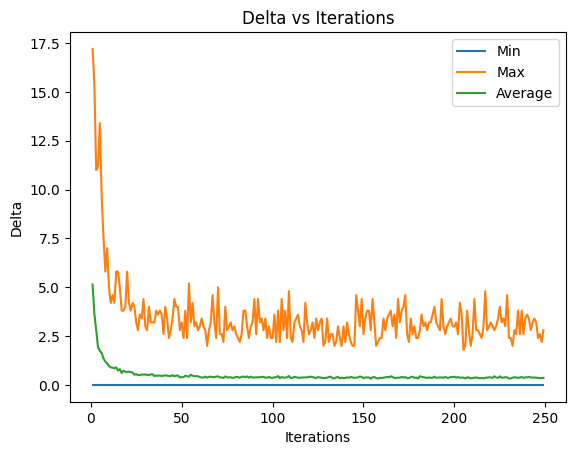

In [3]:
fig, ax = plt.subplots()
ax.plot(iterations, min_values, label="Min")
ax.plot(iterations, max_values, label="Max")
ax.plot(iterations, average_values, label="Average")
ax.set_xlabel("Iterations")
ax.set_ylabel("Delta")
ax.set_title("Delta vs Iterations")
ax.legend()
plt.show()

In [4]:
import numpy as np
buckets = np.arange(0, 5.1, 0.1)
p = sorted([round(a, 2)for a in all_data])

counts, _ = np.histogram(p, bins=buckets)


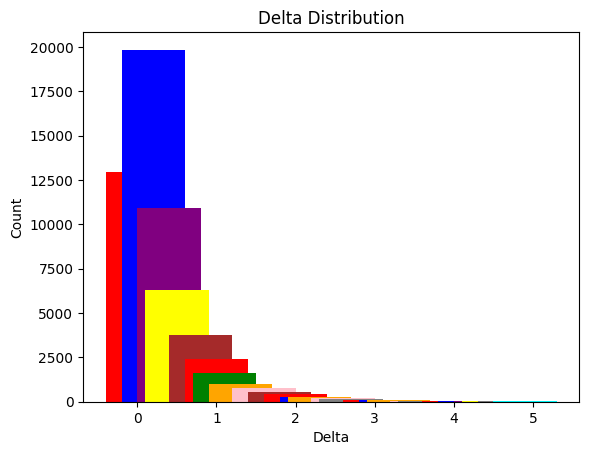

In [5]:
fig, ax = plt.subplots()

ax.bar(buckets[:-1], counts, color=['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'gray', 'brown', 'cyan']
)
ax.set_xlabel("Delta")
ax.set_ylabel("Count")
ax.set_title("Delta Distribution")
plt.show()